## Area Plots, Histograms, and Bar Plots

### Downloading and Prepping Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [5]:
df_can = df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis = 1)
df_can.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### 2. Rename some of the columns so that they make sense.

In [6]:
df_can = df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'})

### 3. For consistency, ensure that all column labels of type string.

In [7]:
all(isinstance(column,str) for column in df_can.columns.values)

False

In [8]:
df_can.columns = list(map(str,df_can.columns))

In [9]:
df_can.set_index('Country',inplace = True)
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can['Total'] = df_can.sum(axis = 1)

<ipython-input-10-327e637cc9af>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [11]:
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
years = list(map(str,range(1980,2014)))

## Visualizing Data using Matplotlib

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.7.1


## Area Plots

### Creating a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

In [14]:
df_can.sort_values(['Total'],axis = 0,ascending= False,inplace = True)

In [15]:
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False.`

Text(0, 0.5, 'numbers of migrations')

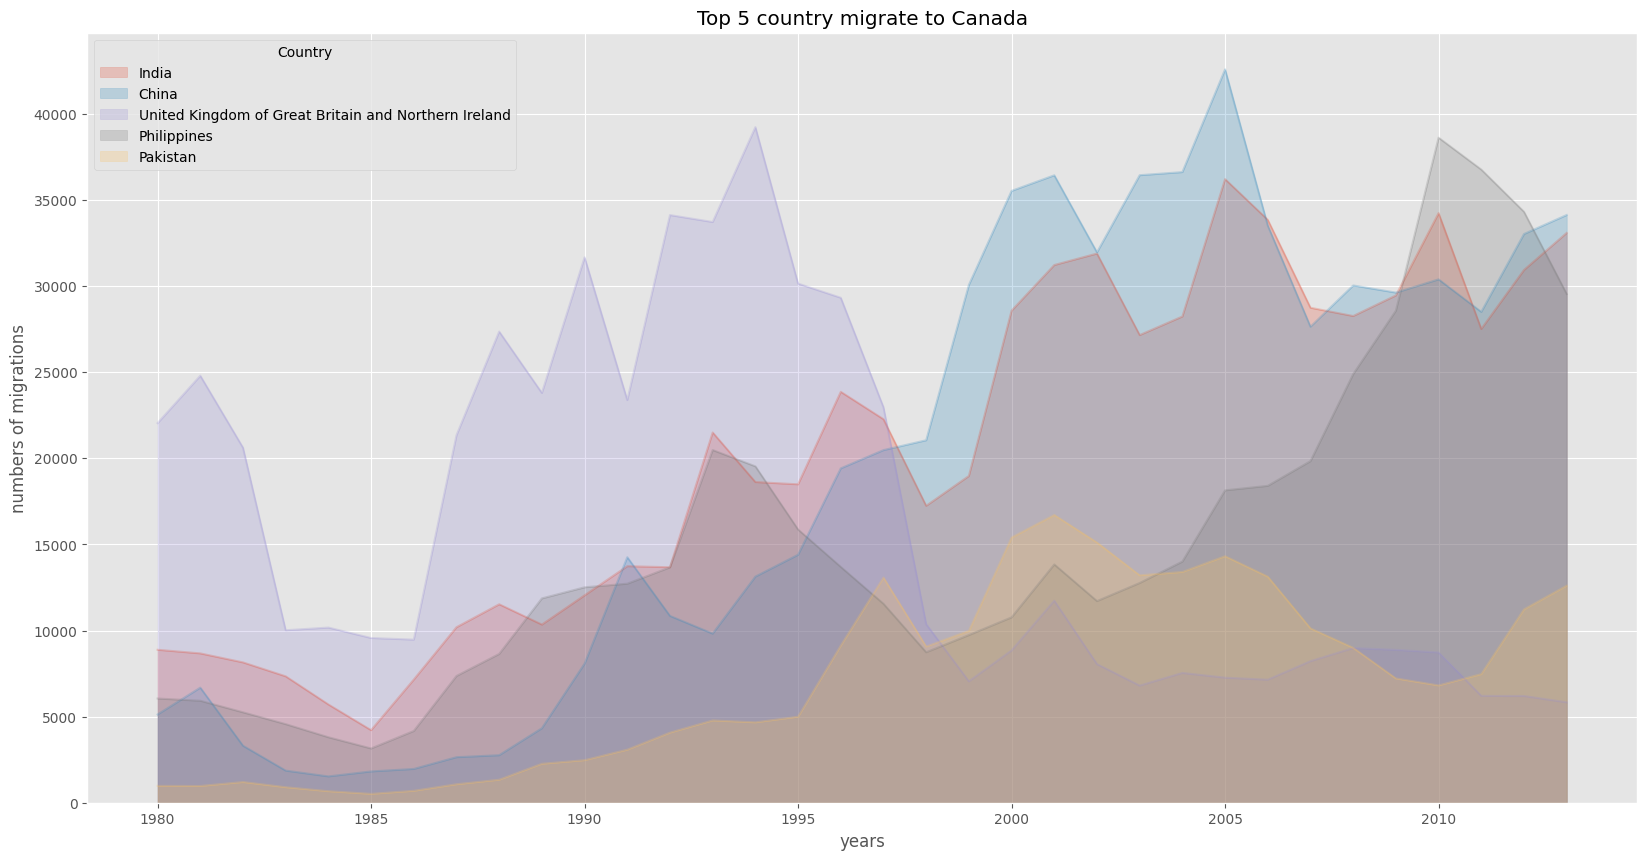

In [38]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area',alpha = 0.25, stacked = False, figsize=(20, 10),) # pass a tuple (x, y) size)

plt.title('Top 5 country migrate to Canada')
plt.xlabel('years')
plt.ylabel('numbers of migrations')

### Two types of plotting

*Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' *

<Axes: >

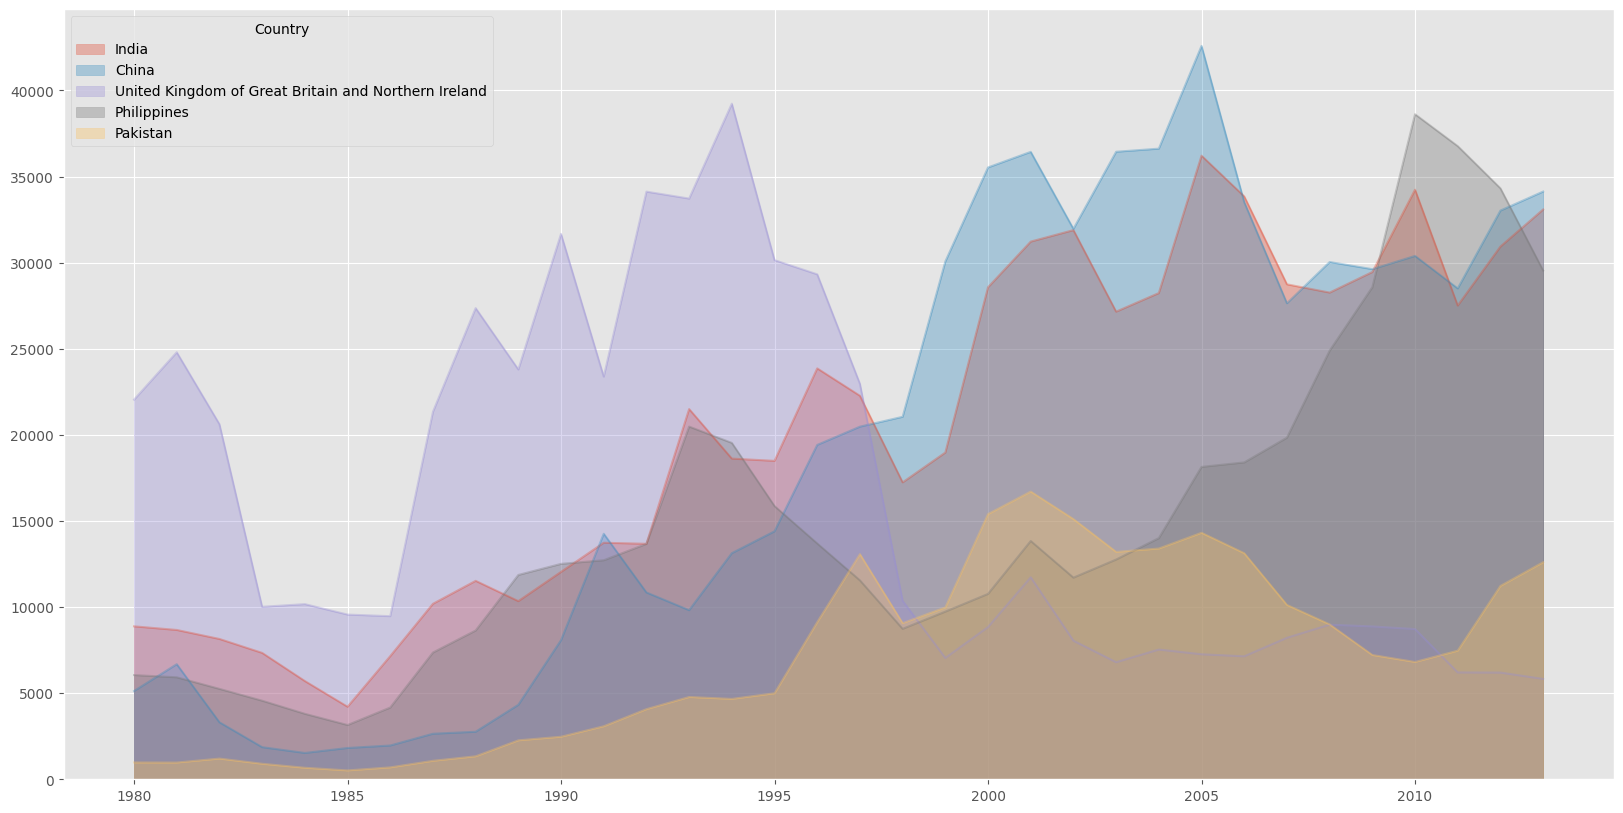

In [39]:
df_top5.plot(kind = 'area',alpha = 0.35, stacked = False,figsize=(20, 10) )

*Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *

Text(0, 0.5, 'count')

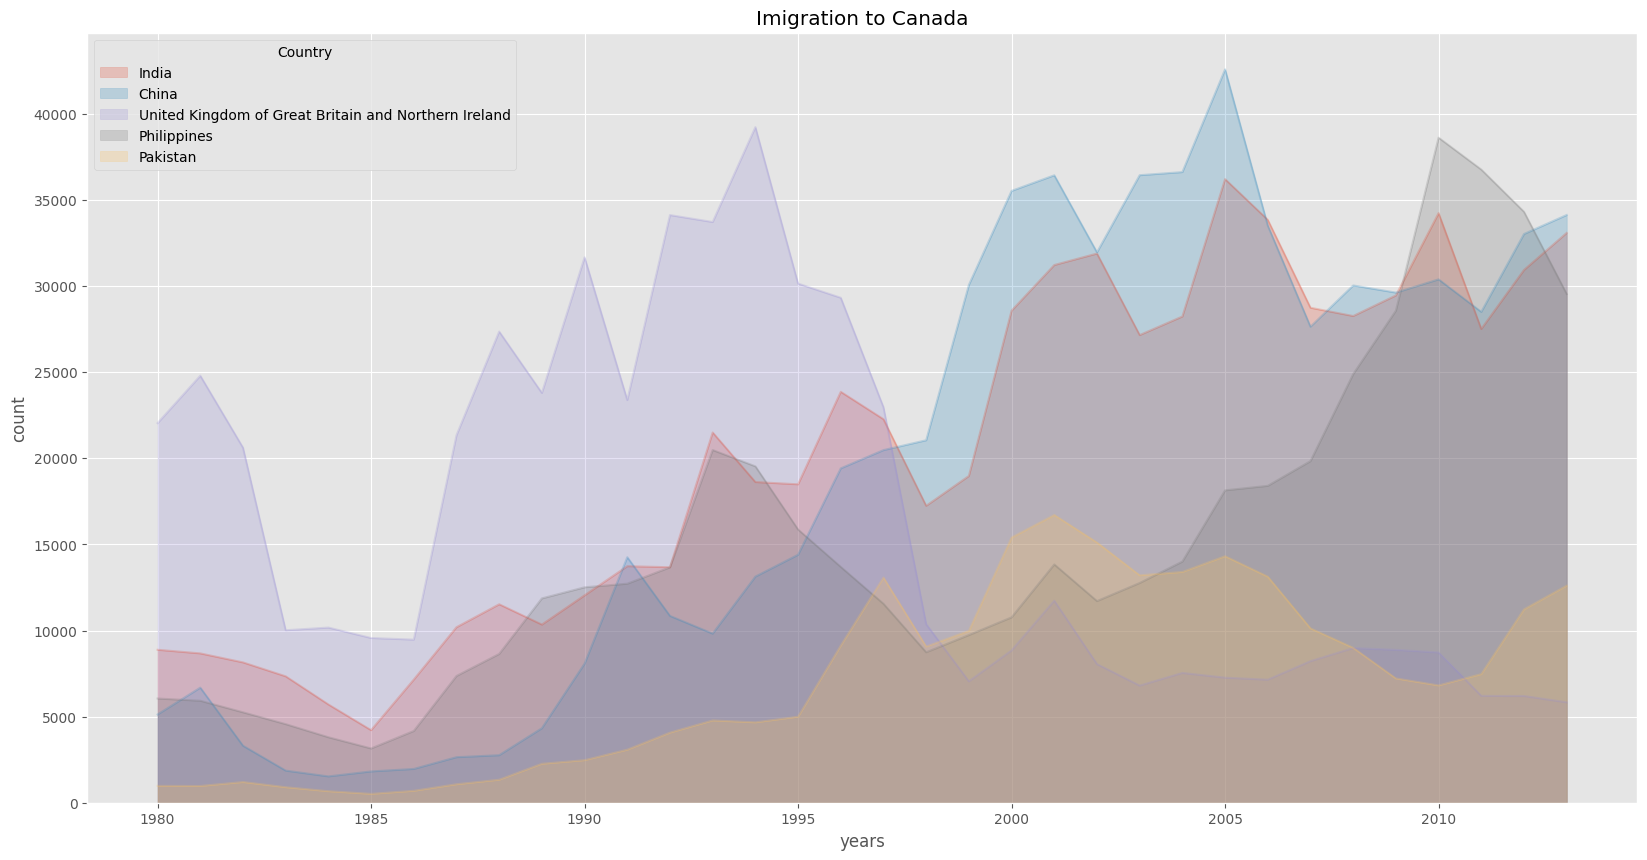

In [42]:
ax = df_top5.plot(kind = 'area', stacked = False, alpha = 0.25,figsize=(20, 10))
ax.set_title('Imigration to Canada')
ax.set_xlabel('years')
ax.set_ylabel('count')

### Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.



In [53]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

Text(0, 0.5, 'count')

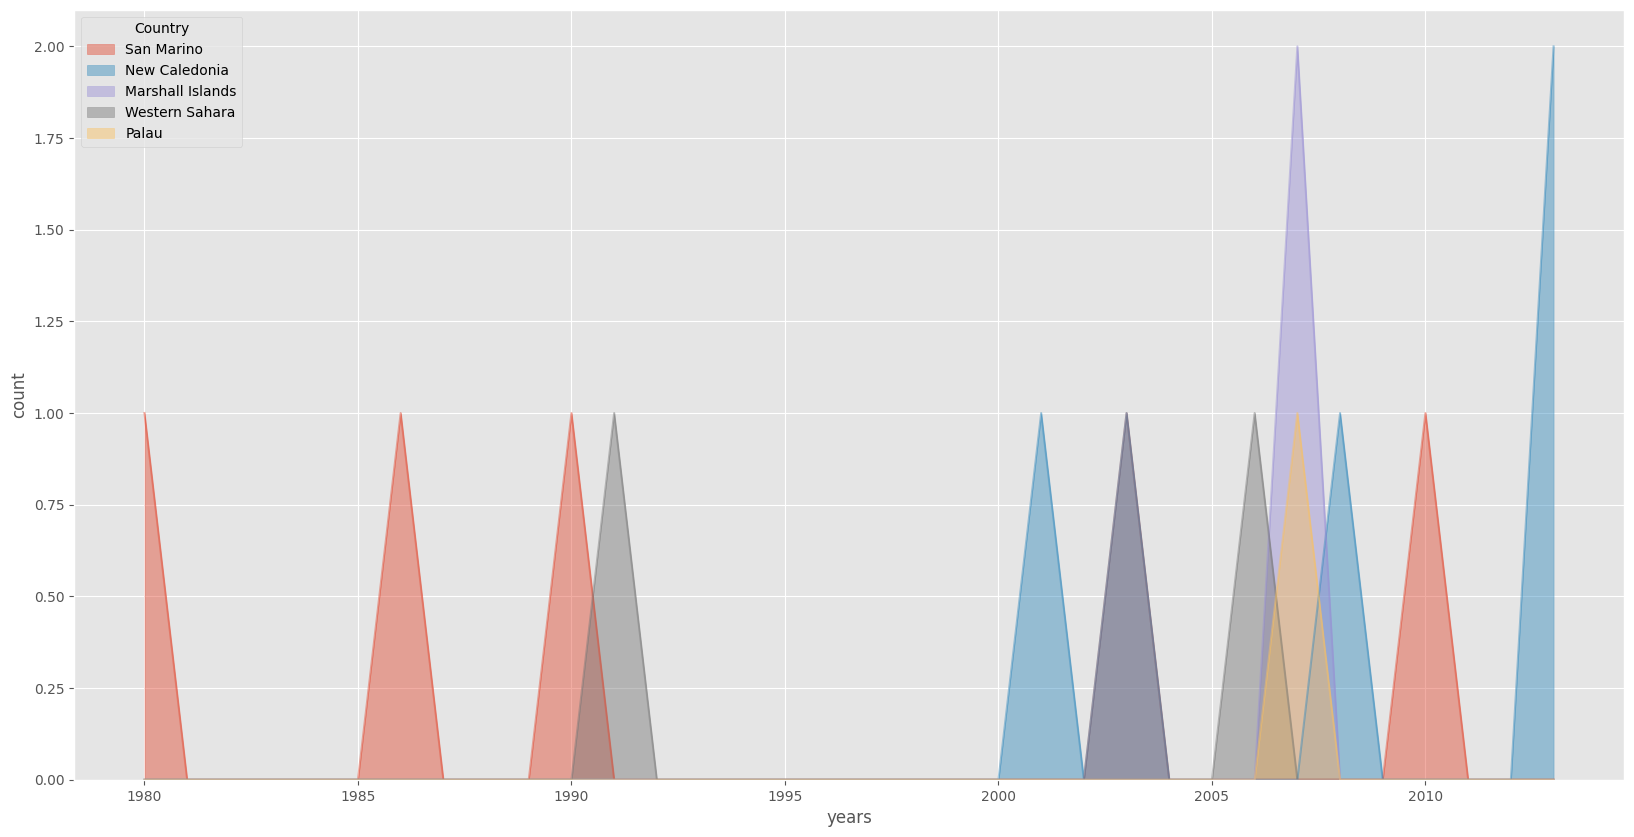

In [54]:
df_least5.plot(kind = 'area',alpha = 0.45,stacked = False, figsize=(20, 10))
plt.xlabel('years')
plt.ylabel('count')

### Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'count')

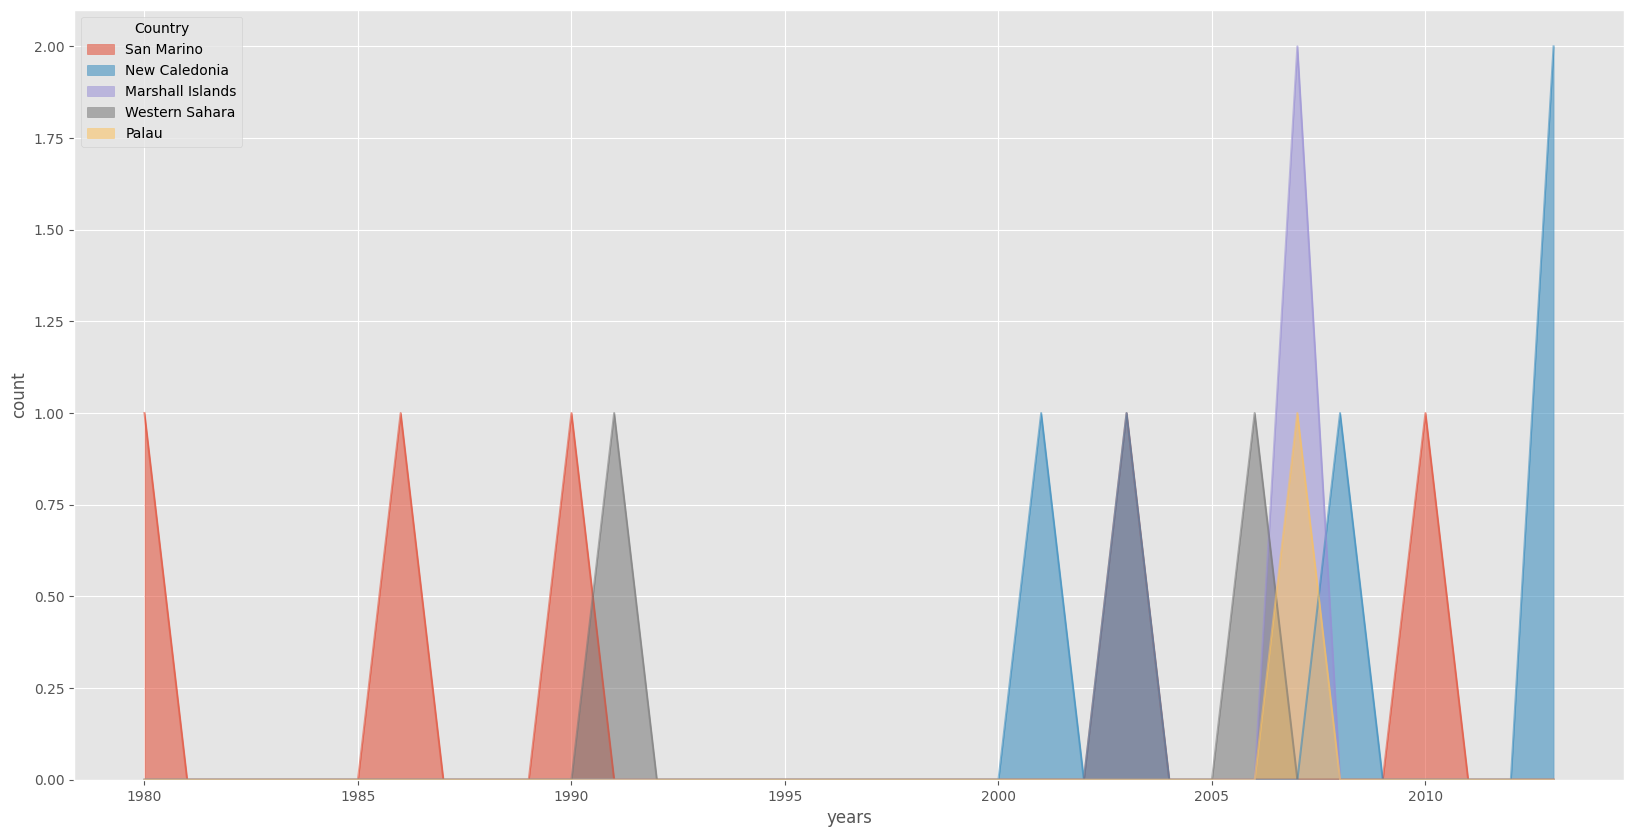

In [55]:
ax = df_least5.plot(kind = 'area',stacked = False, alpha = 0.55, figsize = (20,10))
ax.set_xlabel('years')
ax.set_ylabel('count')

## **Histograms**

### Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [16]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [17]:
count,bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Text(0, 0.5, 'number of country')

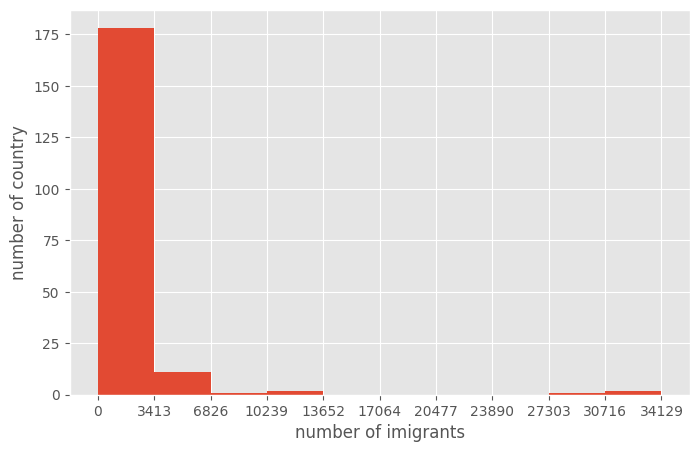

In [18]:
df_can['2013'].plot(kind = 'hist',figsize = (8,5), xticks = bin_edges)
plt.xlabel('number of imigrants')
plt.ylabel('number of country')

### Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

Text(0, 0.5, 'numbers of years')

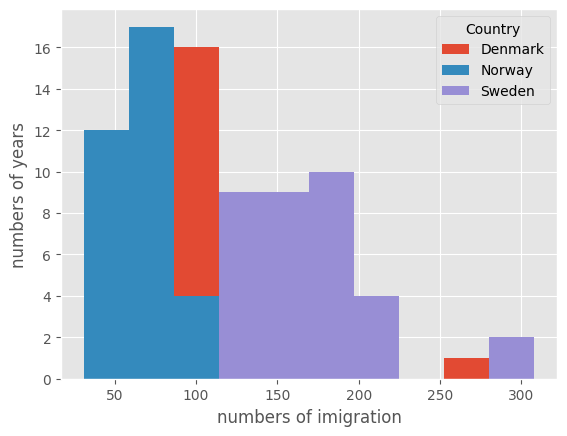

In [19]:
df_can.loc[['Denmark','Norway','Sweden'],years]

df_t = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.plot.hist()

plt.xlabel('numbers of imigration')
plt.ylabel('numbers of years')

In [20]:
count, bin_edges = np.histogram(df_t,15)
print(count)
print(bin)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
<built-in function bin>


## Bar Charts (Dataframe)

### Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [21]:
df_iceland =  df_can.loc['Iceland',years]
df_iceland.head()


1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

Text(0, 0.5, 'years')

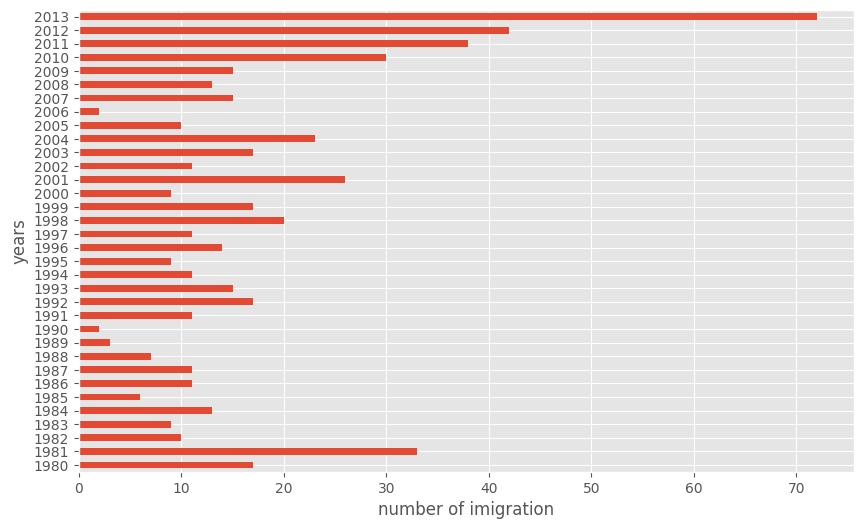

In [26]:
df_iceland.plot(kind = 'barh',figsize = (10,6))

plt.xlabel('number of imigration')
plt.ylabel('years')

## Horizontal Bar Plot

### Question: Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

### Step 1: Get the data pertaining to the top 15 countries.

In [35]:
df_top15 = df_can['Total'].head(15)
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

### Step 2: Plot data:

<Axes: ylabel='Country'>

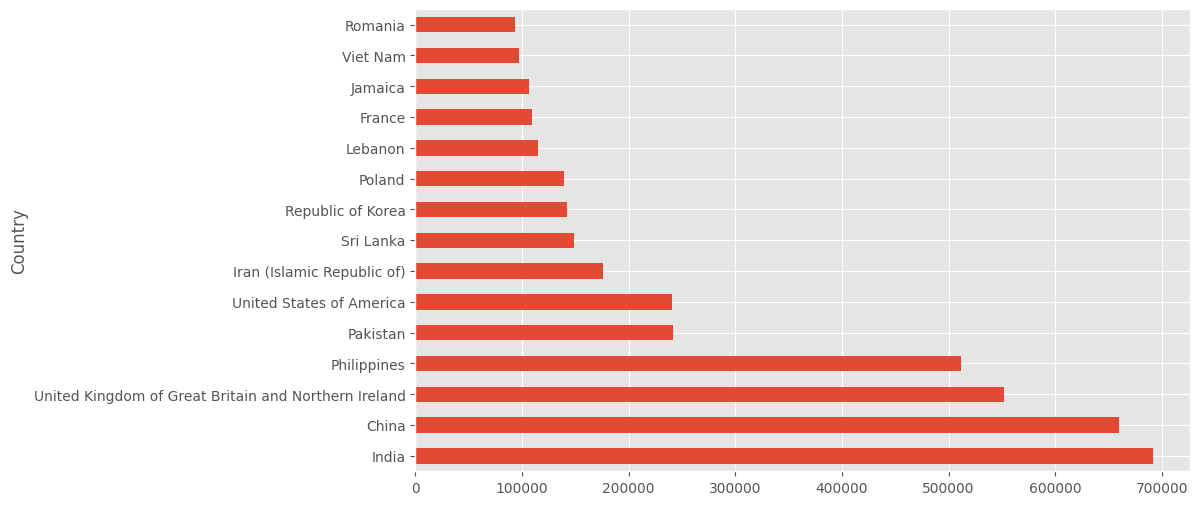

In [36]:
df_top15.plot(kind = 'barh',figsize = (10,6))

## Bar Charts (Dataframe)